In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import random
from math import sqrt

In [43]:
def sciPrintR(val, relErr, name=None):
    if name != None:
        print name, val, "+-", val * relErr, "(", relErr * 100., "%)"
    else:
        print val, "+-", val * relErr, "(", relErr * 100., "%)"
        
def sciPrintD(val, dErr, name=None):
    if name != None:
        print name, val, "+-", dErr, "(", (dErr/val) * 100., "%)"
    else:
        print val, "+-", dErr, "(", (dErr/val) * 100., "%)"
        
def prodErrorR(errors):
    errors = np.array(errors)
    return np.sqrt((errors**2).sum())

def stdPlt(X, Y):
    fig = plt.figure(figsize=(8, 16))
    plt.title("$Freq(N)$ diagram")

    ax = fig.add_subplot(111)
    x_minor_ticks = np.linspace(0, X.max() * 1.05+ 0.0001, 125) # 104 
    x_major_ticks = np.array([x_minor_ticks[i] for i in range(0, x_minor_ticks.size, 20)])
    y_minor_ticks = np.linspace(0, Y.max()* 1.05+ 0.0001, 248) # 4822
    y_major_ticks = np.array([y_minor_ticks[i] for i in range(0, y_minor_ticks.size, 20)])


    ax.set_xticks(x_major_ticks)
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.set_yticks(y_minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.4, linestyle='-')
    ax.grid(which='major', alpha=0.7, linestyle='-')


    plt.xlim((0, X.max() * 1.05))
    plt.ylim((0, Y.max() * 1.05))

    
    k = Y.max() / Y.mean()
    plt.plot([0, X.mean() * k], [0, Y.mean()* k], color="red")
    plt.plot(X, Y)
    plt.scatter(X, Y, s=5, color="black")
    plt.show()

    
print(math.sqrt(0.1*0.1  + 0.6*0.6 + 0.4*0.4))
prodErrorR([0.1,0.6,0.4])


0.728010988928


0.72801098892805183

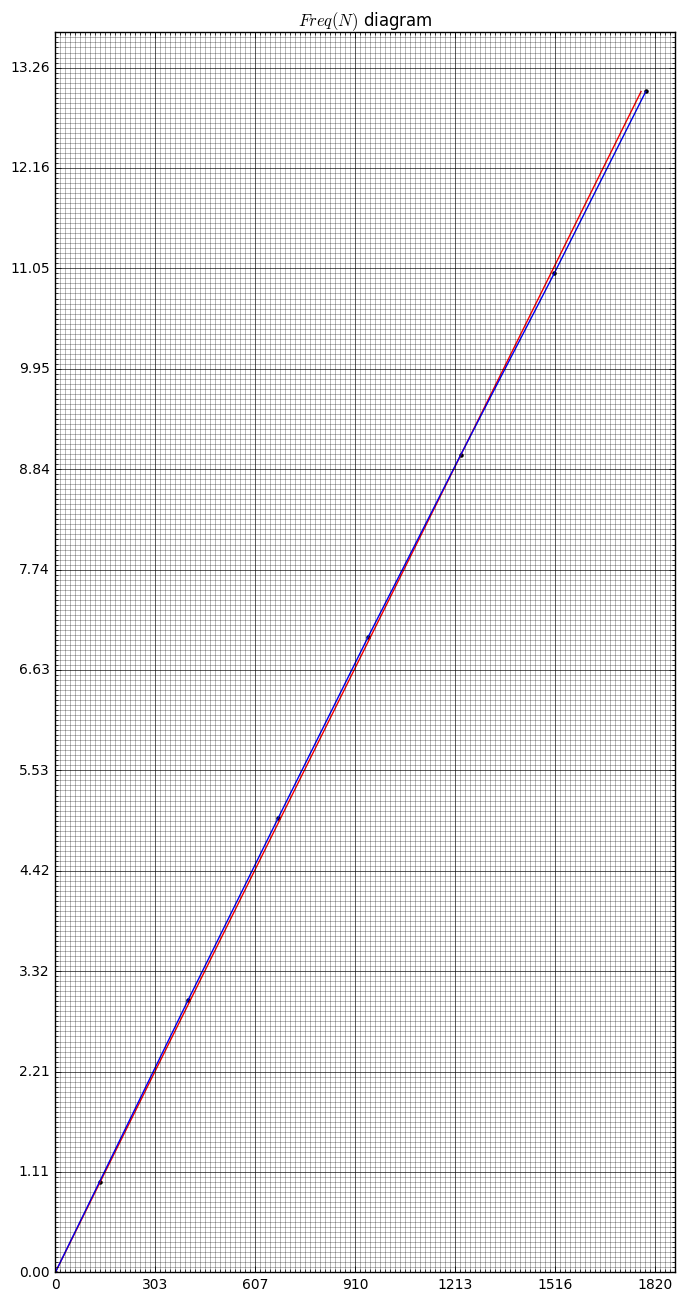

In [51]:
freqs = np.array([0, 134.4, 403.0, 675.7, 949.4, 1229.6, 1513.5, 1790.9]) # ! corrr
ns = np.array([0, 1, 3, 5, 7, 9, 11, 13])

X = freqs
Y = ns

stdPlt(X, Y)

In [45]:
m1 = 492.7
m2 = 494.6
m3 = 491.5

print("New start freq = ", freqs[1] * sqrt((m1 + m2 + m3)/(m1 + m2)))

('New start freq = ', 164.48618243331526)


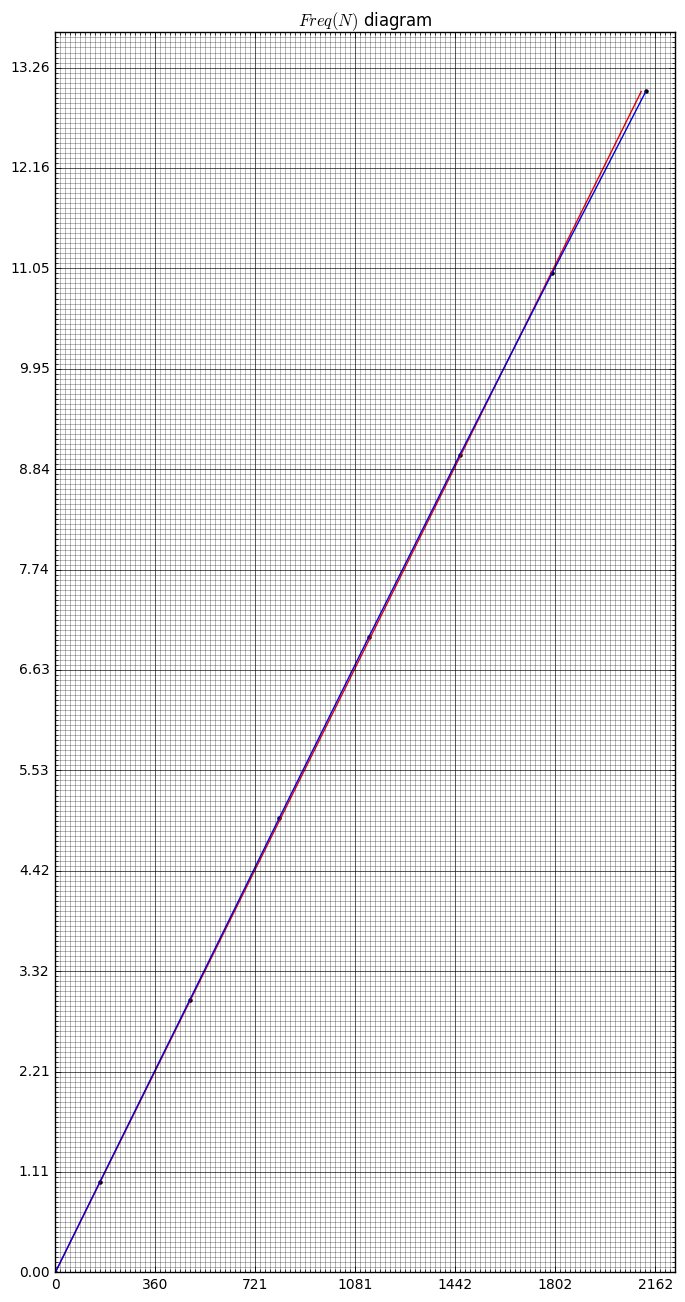

In [46]:
freq2 = np.array([0, 161.1, 484.6, 806.7, 1130.5, 1457.55, 1790.7, 2128.0])
ns2 = np.array([0, 1, 3, 5, 7, 9, 11, 13])

stdPlt(freq2, ns2)